<a href="https://colab.research.google.com/github/ninavankalas/GraphicsGems/blob/master/%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F%201%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/my-drive' 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
import numpy as np
!apt install unzip
!unzip '/content/gdrive/My Drive/PairedEvents.zip'
!pip install requests


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Archive:  /content/gdrive/My Drive/PairedEvents.zip
replace PairedEvents/Image figure examples/Event1175gamma-rayNSB0_NSB2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [26]:
!git clone https://github.com/cta-observatory/ctapipe.git /content/ctapipe

!pip install iminuit
!pip install eventio
%cd /content/ctapipe
!pwd
!ls
!pip -V
!python /content/ctapipe/setup.py install
from ctapipe.utils import get_dataset_path
from ctapipe.image.geometry_converter import convert_geometry_hex1d_to_rect2d, convert_geometry_rect2d_back_to_hexe1d
from ctapipe.visualization import CameraDisplay
from ctapipe.io import event_source
import copy
import matplotlib.pyplot as plt

fatal: destination path '/content/ctapipe' already exists and is not an empty directory.
/content/ctapipe
/content/ctapipe
AUTHORS     ctapipe	      environment.yml  Makefile        README.rst
build	    ctapipe.egg-info  examples	       MANIFEST.in     setup.cfg
ci	    dist	      History.md       PairedEvents    setup.py
CODEOWNERS  docs	      LICENSE	       pyproject.toml
pip 19.3.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
running install
running bdist_egg
running egg_info
writing ctapipe.egg-info/PKG-INFO
writing dependency_links to ctapipe.egg-info/dependency_links.txt
writing entry points to ctapipe.egg-info/entry_points.txt
writing requirements to ctapipe.egg-info/requires.txt
writing top-level names to ctapipe.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
no previously-included directories found matching 'build'
no previously-included directories found matching 'docs/_build'
no previously-included directories found matching 'docs/api'
writing 

<Figure size 432x288 with 0 Axes>

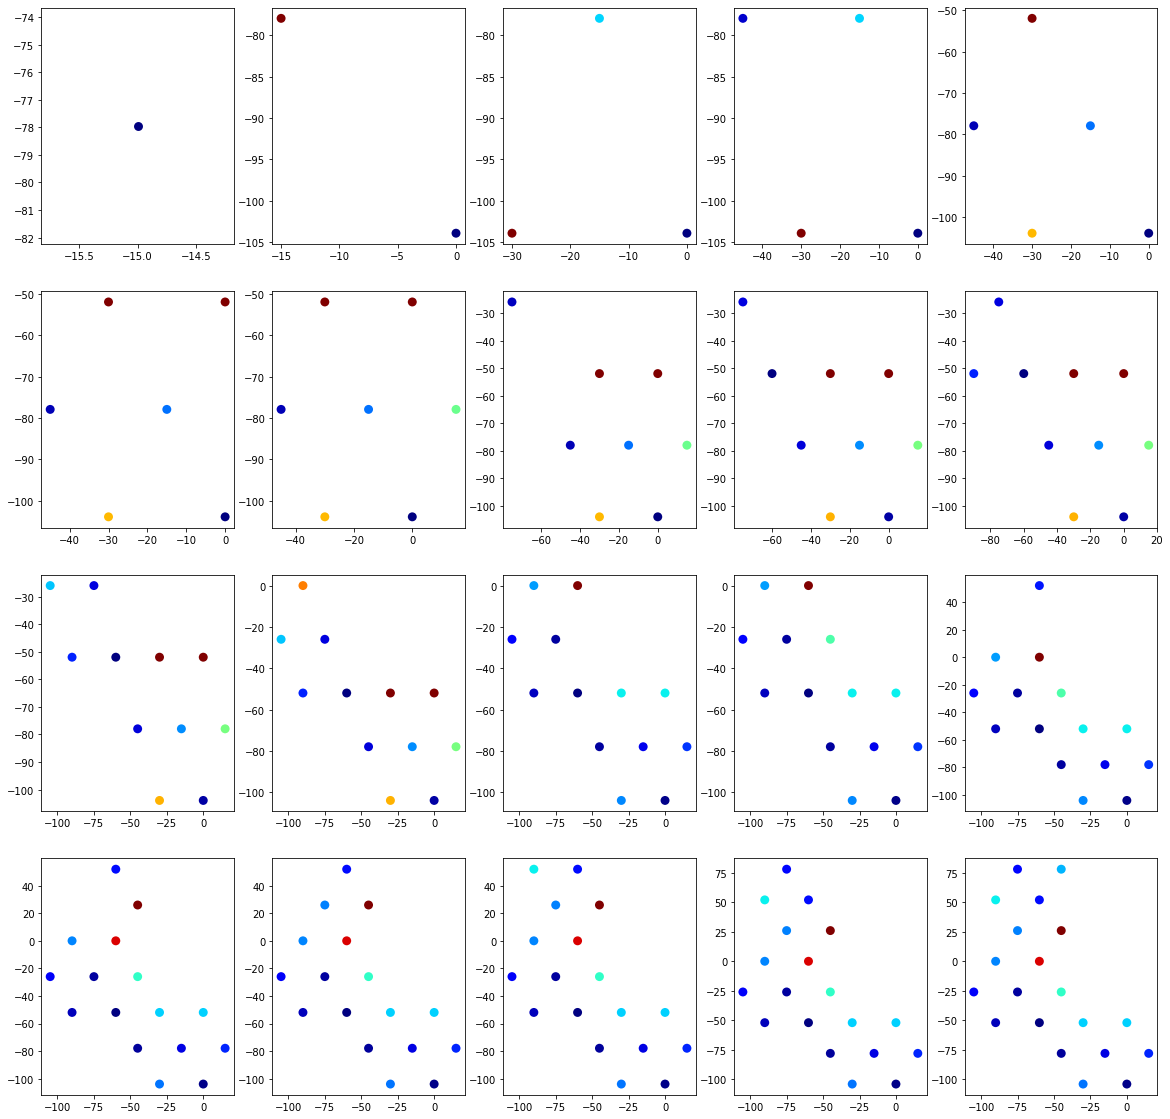

In [28]:
import numpy as np
import  matplotlib.pyplot as plt
n=1

x_axis=np.genfromtxt('/content/gdrive/My Drive/X_AXIS.txt', dtype=np.float32, delimiter='	')
y_axis=np.genfromtxt('/content/gdrive/My Drive/Y_AXIS.txt', dtype=np.float32, delimiter='	')
Z = np.genfromtxt('PairedEvents/ev1-2482-NSB2-trigger2x7-no-cleaning-paired.txt', dtype=np.float32, delimiter='\t', skip_footer = 482 )
Z = np.delete(Z, 0, axis=1)

x_1 = x_axis #[:n]
y_1 = y_axis #[:n]
z_1 = Z[0]   #[:n]
#X,Y = np.meshgrid(x_axis,y_axis)
#plt.imshow(z, interpolation='nearest', cmap=plt.cm.viridis, extent=[-2,2,2,2])
#plt.show()
plt.figure()
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20,20))
for row in ax:
    for col in row:
        col.scatter(x_1[:n], y_1[:n], c=z_1[:n],cmap="jet", s=80, lw=0)
        n=n+1

#points1 = ax[0,0].scatter(x_1[:n], y_1[:n], c=z_1[:n],cmap="jet", lw=0)
#points2 = ax[0,1].scatter(x_1[:n+1], y_1[:n+1], c=z_1[:n+1],cmap="jet", lw=0)
#points3 = ax[1,0].scatter(x_1[:n+2], y_1[:n+2], c=z_1[:n+2],cmap="jet", lw=0)
#points4 = ax[1,1].scatter(x_1[:n+3], y_1[:n+3], c=z_1[:n+3],cmap="jet", lw=0)

#plt.colorbar(points1)
plt.show()

In [0]:
import matplotlib.pyplot as plt
import numpy as np


def hex_to_rect (x_axis, y_axis, event_sorted):
  ind_1 = np.lexsort((event_sorted, x_axis, y_axis))
  y_axis_1 = [None]*560
  p = 0
  for i in ind_1: 
     y_axis_1 [p] = y_axis[i] 
     p = p + 1

  sk = 1
  b = [None]*31
  b[0] = y_axis_1[0]
  for i in range (560):
      if b[sk-1]!=y_axis_1[i]:
         b[sk] = y_axis_1[i]
         sk +=1
  y_axis_1 = []
  for z in range (30):
    y_axis_1 = np.insert(y_axis_1, obj = [z*30]*30, values = b[z] )

  a = np.empty((30,30), dtype = np.float32)
  x_min = -675

  for j in range (30):
     for i in range (30):
        a[j][i] = x_min + i*30 
  x_min+=15

  x_axis_1 = a.flatten()

  exam = np.zeros((900), dtype = np.float64)
  exam = np.insert(event_sorted, values = [0]*22, obj = 0 ) 
  exam = np.insert(exam, values = [0]*6, obj = 24)
  exam = np.insert(exam, values = [0]*17, obj = 30)
  exam = np.insert(exam, values = [0]*4, obj = 26)
  exam = np.insert(exam,values = [0]*16, obj = 60)
  exam = np.insert(exam, values = [0]*2, obj = 28)
  exam = np.insert(exam, values = [0]*16, obj = 30)
  exam = np.insert(exam, values = [0]*16, obj = 90)
  exam = np.insert(exam, values = [0]*15, obj = 120)
  exam = np.insert(exam, values = [0], obj = 149)
  exam = np.insert(exam, values = [0]*13, obj = 150)
  exam = np.insert(exam, values = [0], obj = 179)
  exam = np.insert(exam, values = [0]*8, obj = 180)
  exam = np.insert(exam, values = [0]*2, obj = 190)
  exam = np.insert(exam, values = [0], obj = 209)
  exam = np.insert(exam, values = [0]*7, obj = 210)
  exam = np.insert(exam, values = [0]*2, obj = 238)
  exam = np.insert(exam, values = [0]*7, obj = 240)
  exam = np.insert(exam, values = [0]*2, obj = 268)
  exam = np.insert(exam, values = [0]*7, obj = 270)
  exam = np.insert(exam, values = [0]*6, obj = 300)
  exam = np.insert(exam, values = [0]*4, obj = 330)
  exam = np.insert(exam, values = [0], obj = 359)
  exam = np.insert(exam, values = [0]*3, obj = 360)
  exam = np.insert(exam, values = [0], obj = 389)
  exam = np.insert(exam, values = [0]*3, obj = 390)
  exam = np.insert(exam, values = [0], obj = 419)
  exam = np.insert(exam, values = [0]*3, obj = 420)
  exam = np.insert(exam, values = [0]*2, obj = 448)
  exam = np.insert(exam, values = [0]*2, obj = 450)
  exam = np.insert(exam, values = [0]*4, obj = 476)
  exam = np.insert(exam, values = [0]*2, obj = 480)
  exam = np.insert(exam, values = [0]*5, obj = 505)
  exam = np.insert(exam, values = [0]*2, obj = 510)
  exam = np.insert(exam, values = [0]*5, obj = 535)
  exam = np.insert(exam, values = [0], obj = 540)
  exam = np.insert(exam, values = [0]*5, obj = 565)
  exam = np.insert(exam, values = [0], obj = 570)
  exam = np.insert(exam, values = [0]*6, obj = 594)
  exam = np.insert(exam, values = [0], obj = 600)
  exam = np.insert(exam, values = [0]*6, obj = 624)
  exam = np.insert(exam, values = [0]*6, obj = 654)
  exam = np.insert(exam, values = [0]*7, obj = 683)
  exam = np.insert(exam, values = [0]*2, obj = 690)
  exam = np.insert(exam, values = [0]*9, obj = 711)
  exam = np.insert(exam, values = [0]*4, obj = 720)
  exam = np.insert(exam, values = [0]*10, obj = 740)
  exam = np.insert(exam, values = [0]*4, obj = 750)
  exam = np.insert(exam, values = [0]*12, obj = 768)
  exam = np.insert(exam, values = [0]*3, obj = 780)
  exam = np.insert(exam, values = [0]*13, obj = 797)
  exam = np.insert(exam, values = [0]*3, obj = 810)
  exam = np.insert(exam, values = [0]*15, obj = 825)
  exam = np.insert(exam, values = [0]*5, obj = 840)
  exam = np.insert(exam, values = [0]*16, obj = 856)
  exam = np.insert(exam, values = [0]*2, obj = 852)
  fin = np.reshape(exam, (30,30))
  return fin


In [31]:
import os
import cv2
import h5py
import pandas as pd
from PIL import Image
from sklearn.preprocessing import normalize
import numpy as np


n = 35
k = 560//n
print ('here we go')


x_axis=np.genfromtxt('/content/gdrive/My Drive/X_AXIS.txt', dtype=np.float32, delimiter='	')
y_axis=np.genfromtxt('/content/gdrive/My Drive/Y_AXIS.txt', dtype=np.float32, delimiter='	')



x_df = np.genfromtxt('PairedEvents/ev1-2482-NSB2-trigger2x7-no-cleaning-paired.txt', dtype=np.float32, delimiter='\t', skip_footer = 482 )
y_df = np.genfromtxt('PairedEvents/ev1-2482-NSB0-trigger2x7-no-cleaning-paired.txt', dtype=np.float32, delimiter='\t', skip_footer = 482 )
x_t = np.genfromtxt('PairedEvents/ev1-2482-NSB2-trigger2x7-no-cleaning-paired.txt', dtype=np.float32, delimiter='\t', skip_header = 4000, max_rows=482)
y_t = np.genfromtxt('PairedEvents/ev1-2482-NSB0-trigger2x7-no-cleaning-paired.txt', dtype=np.float32, delimiter='\t',skip_header = 4000, max_rows=482)

print(x_t[481][0])
print(x_df[1481][0])

print ('да ты послушай')
print (x_t.shape)
x_df = np.delete(x_df, 0, axis=1)
y_df = np.delete(y_df, 0, axis=1)
print(x_df.shape) #, max_rows = 482
x_t = np.delete(x_t, 0, axis=1)
y_t = np.delete(y_t, 0, axis=1)
print ('been there done that')

ind_1 = np.lexsort((x_df[0], x_axis, y_axis))

y_axis_1 = [None]*560
p =  0
for i in ind_1: #ind_1
     y_axis_1 [p] = y_axis[i] #y_axis
     p = p + 1

sk = 1
b = [None]*31
b[0] = y_axis_1[0]
for i in range (560):
      if b[sk-1]!=y_axis_1[i]:
         b[sk] = y_axis_1[i]
         sk +=1
y_axis_1 = []

for z in range (30):
    y_axis_1 = np.insert(y_axis_1, obj = [z*30]*30, values = b[z] )

x_min = -675
a = np.empty((30,30), dtype = np.float32)

for j in range (30):
     for i in range (30):
        a[j][i] = x_min + i*30 
     x_min+=15

x_axis_1 = a.flatten()



x_df_sort = np.empty((2000,560), dtype = np.float64) #fix dimensions
y_df_sort = np.empty((2000,560), dtype = np.float64)
x_t_sort = np.empty((482,560), dtype = np.float64) 
y_t_sort = np.empty((482,560), dtype = np.float64)


for i in range(2000):
  k = 0
  for j in ind_1:
    x_df_sort[i][k] = x_df[i][j] 
    y_df_sort[i][k] = y_df[i][j]
    k  = k + 1

for i in range(482):
  k=0
  for j in ind_1:
    x_t_sort[i][k] = x_t[i][j] 
    y_t_sort[i][k] = y_t[i][j]
    k = k + 1


x_df_sort = normalize(x_df_sort, norm = 'max', axis=0)
y_df_sort = normalize(y_df, norm = 'max', axis=0)
x_t_sort = normalize(x_t, norm = 'max', axis=0)
y_t_sort = normalize(y_t, norm = 'max', axis=0)

x_train_rect =  np.empty((2000, 30, 30), dtype = np.float64) #fix dimensions
y_train_rect = np.empty((2000,30, 30), dtype = np.float64)
x_t_rect = np.empty((482,30, 30), dtype = np.float64) 
y_t_rect = np.empty((482, 30, 30), dtype = np.float64)
for i in range (2000):
  x_train_rect [i] = hex_to_rect(x_axis, y_axis, x_df_sort[i])
  y_train_rect [i] = hex_to_rect(x_axis, y_axis, y_df_sort[i])
for i in range (482):
  x_t_rect [i] = hex_to_rect(x_axis, y_axis, x_t_sort[i])
  y_t_rect [i] = hex_to_rect(x_axis, y_axis, y_t_sort[i])
x_train = np.reshape(x_train_rect, (2000, 30, 30, 1))
y_train = np.reshape(y_train_rect, (2000, 30, 30, 1))
x_test =  np.reshape(x_t_rect, (482, 30, 30, 1))
y_test = np.reshape(y_t_rect, (482, 30, 30, 1))

print(x_train.shape) 
x_train_pic = np.reshape (x_train_rect, (2000, 30, 30))
y_train_pic = np.reshape(y_train_rect, (2000, 30, 30))
x_test_pic =  np.reshape(x_t_rect, (482, 30, 30))
y_test_pic = np.reshape(y_t_rect, (482, 30, 30))


print ('still got it')



here we go
2482.0
1482.0
да ты послушай
(482, 561)
(2000, 560)
been there done that
(2000, 30, 30, 1)
still got it


In [51]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, activations



#вставка: импорт фотографий с ImageNet


#нейронная сеть
class denoiser:
  def __init__(self, model=0):
    self.width = 0
    self.height = 0
    self.depth = 0
    padding = 1
    kernel_size = 3
    self.model = 0
  #преобразовать в чб (если надо)
  def create (self, height, width, depth, channels = 1):
    self.model = models.Sequential() #batch_size, channels, rows, cols
    self.model.add(layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(height, width, depth))) #проверить что тут входные значения 
    #self.model.add(layers.MaxPooling2D((2, 2)))
    self.model.add(layers.Conv2D(32, (3,3), activation =  'relu')) 
    #self.model.add(layers.MaxPooling2D((2, 2)))
    self.model.add(layers.Conv2D(64, (2,2), activation =  'relu'))
    self.model.add(layers.Conv2DTranspose(32, (2,2), activation = 'relu'))
    #self.model.add(layers.UpSampling2D((2,2), data_format = 'channels_last')) #используются
    self.model.add(layers.Conv2DTranspose(16, (3,3), activation = 'relu'))
    #self.model.add(layers.UpSampling2D((2,2), data_format = 'channels_last'))
    self.model.add(layers.Conv2DTranspose(1, (3,3), activation = 'relu' ))
    
    self.model.summary()
  def train (self, train_noise, train_orig, ep):
    self.model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

    history = self.model.fit(train_noise, train_orig, epochs=ep, 
                    validation_data=(train_noise, train_orig)) #self.make(train_noise) вместо train_noise
  def evaluate (self, test_noise,test_orig):
    test_loss, test_acc = self.model.evaluate(test_noise,  test_orig, verbose=2) #self.make(test_noise) вместо test_noise
    print ('loss: ', test_loss, ' ', 'accuracy: ', test_acc)
  def make (self, pic):
    pred = self.model.predict(pic)
    return pred
  #def use (x):

a = denoiser ()
a.create (height = 30, width = 30, depth = 1)

print ('yay')
a.train(x_train, y_train, ep = 7)
a.train(y_train, y_train, ep = 1)
 

a.evaluate (x_test, y_test)
#вставка: графики результатов



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 26, 26, 32)        4640      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 25, 25, 64)        8256      
_________________________________________________________________
conv2d_transpose_30 (Conv2DT (None, 26, 26, 32)        8224      
_________________________________________________________________
conv2d_transpose_31 (Conv2DT (None, 28, 28, 16)        4624      
_________________________________________________________________
conv2d_transpose_32 (Conv2DT (None, 30, 30, 1)         145       
Total params: 26,049
Trainable params: 26,049
Non-trainable params: 0
_________________________________________________

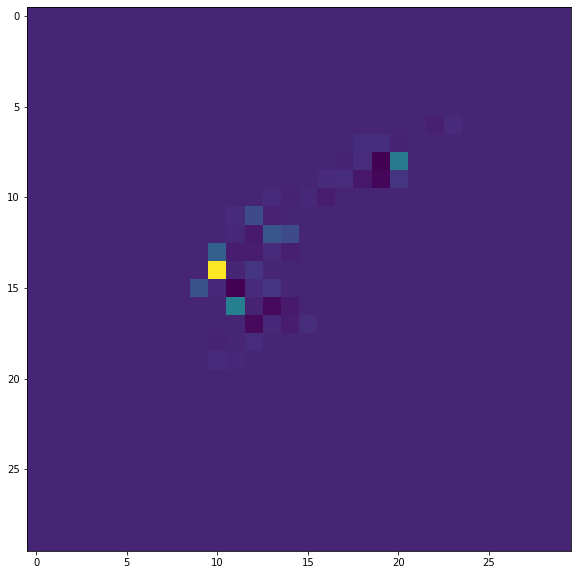

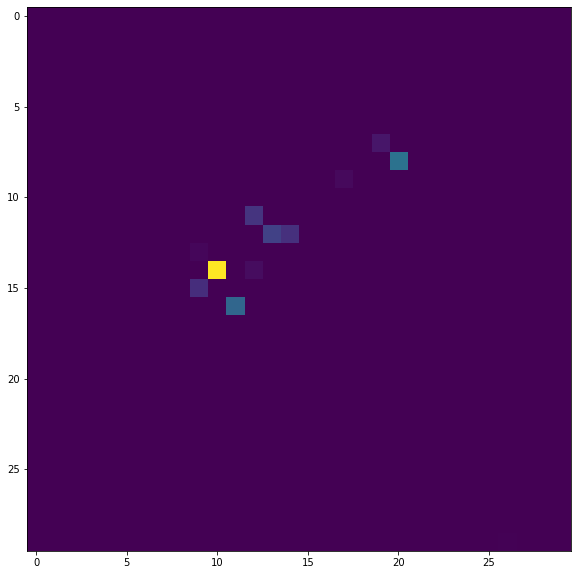

In [54]:


#pic=np.genfromtxt('/content/gdrive/My Drive/example_noise.txt', dtype=np.float32, delimiter='\t')
#pic = (np.expand_dims(pic,0))
pic_nn = np.reshape(x_train[1000], (1, 30, 30, 1))
#pic_show = np.reshape(pic, (1, 30, 30))
plt.figure(figsize=(20,10))
plt.imshow(x_train_pic[1000])

pic_pred = a.make(pic_nn)
pic_pred_show = np.reshape(pic_pred,(30, 30))
plt.figure(figsize=(20,10))
plt.imshow(pic_pred_show)

